# ML Exam

### Objective Goal

This project aims to examine various health factors and their relationships in order to accurately classify diabetes. Factors such as age, gender, BMI, hypertension, heart disease, smoking history, HbA1c level, and blood glucose level will be explored. The aim is to explore how these variables interact and influence the onset and progression of diabetes.

### Domain Knowledge (About my features)

Gender: Gender can influence the risk of diabetes. For example, women with a history of gestational diabetes have a higher risk of developing type 2 diabetes later in life. Similarly, some studies have suggested that men may have a slightly higher risk of diabetes than women.

Age: Age is an important indicator for predicting the risk of diabetes. As people get older, their risk of developing diabetes increases. This is in part because of factors such as reduced physical activity, changes in hormone levels, and an increased chance of developing other conditions that can contribute to diabetes.

Hypertension: Hypertension is a disease that often coexists with diabetes. The two conditions share some risk factors and may contribute to each other's development. Having hypertension increases the likelihood of developing type 2 diabetes and vice versa. 

Heart Disease: Heart disease is associated with an increased diabetes risk. The relationship between the two is bidirectional, i.e. having heart disease or diabetes increases the risk of developing the other. That's because they share many of the same risk factors, such as obesity, high blood pressure, and high cholesterol.

Smoking History: Smoking is a modifiable risk indicator for diabetes. It has been shown that smoking increases the risk of developing type 2 diabetes. It can contribute to insulin resistance and alter glucose metabolism. 

Body Mass Index (BMI): BMI is a measure of body fat based on a person's height and weight. It is often used as an indicator of overall weight status and can be useful in predicting diabetes risk. A higher BMI is associated with a greater probability of developing type 2 diabetes. 

HbA1c Level: HbA1c ("glycated hemoglobin") is a measure of the average blood glucose level over the past 2-3 months. It provides information on long-term glycaemic control. Higher HbA1c levels indicate poorer glycaemic control and are associated with an increased risk of developing diabetes.

Blood Glucose Level: Blood glucose level refers to the amount of glucose (sugar) present in the blood at a specific time. High blood glucose levels, especially when fasting or after consuming carbohydrates, may indicate impaired glucose regulation and increase the risk of developing diabetes. 



Imports

In [1]:
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import numpy as np
from scipy.stats import loguniform, beta, uniform, sem
import math
from random import randint

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

import itertools
from termcolor import colored

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (/Users/anakarlasuarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py)

Data & Description

In [9]:
data = pd.read_csv('./data.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [10]:
        # Dataset shape; (rows, columns)
print(colored(f"This Dataset has a total of {data.shape[1]} columns, {data.shape[0]} rows", color = 'blue', attrs= ['bold', 'dark']))
        
        # Tot Missing Values
print(colored(f"Number of missing values: {sum(data.isna().sum())}", color='blue', attrs=['bold','dark'])) 
        
        # Unique Values (Column)
print(colored(f"\nUNIQUE VALUES PER COLUMN:", color= 'blue', attrs= ['bold', 'dark'])) 
display(data.nunique().sort_values(ascending = False))
        
        # Missing Values (Column)
print(colored(f"\nMISSING VALUES PER COLUMN:", color= 'blue', attrs= ['bold', 'dark'])) 
display(data.isna().sum().sort_values(ascending = False))
        
        # Dataset Info
print(colored(f"\nDATASET INFO", color= 'blue', attrs= ['bold', 'dark'])) 
display(data.info())
        

# Check the distribution of numerical variables
print(colored(f'\nSummary statistics for numerical variables:\n', color= 'blue'), data.describe())

This Dataset has a total of 9 columns, 100000 rows
Number of missing values: 0

UNIQUE VALUES PER COLUMN:


bmi                    4247
age                     102
HbA1c_level              18
blood_glucose_level      18
smoking_history           6
gender                    3
hypertension              2
heart_disease             2
diabetes                  2
dtype: int64


MISSING VALUES PER COLUMN:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None


Summary statistics for numerical variables:
                  age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000     

EDA

1. Missing values
2. Numerical features
3. Categorical features
4. Relationship & Correlation between features
5. Target variable

1. Missing values
As seen previously, the dataset does not contain any missing values. However, a couple of features contain categories that do not provide any information. In this case, I have decided to treat them as missing values and recategorise the features in order to make them more understandable and facilitate the imputation techniques to be applied later when transforming the columns. This is the case of the category ‘Other’ in the column ‘gender'.

In [11]:
other = data[data['gender'] == 'Other'].shape[0]
print("Quantity of 'Other' values in the 'gender' column: ", other)

Quantity of 'Other' values in the 'gender' column:  18


In [12]:
def recategorise_gender(gender):
    if gender == 'Male':
        return 0
    elif gender == 'Female':
        return 1
    elif gender == 'Other':
        return np.NAN

data['gender'] = data['gender'].apply(recategorise_gender)
print(data['gender'].value_counts())

1.0    58552
0.0    41430
Name: gender, dtype: int64


'smoking_history'

In [13]:
no_info = data[data['smoking_history'] == 'No Info'].shape[0]
print("Quantity of 'No Info' values in the 'smoking_history' column: ", no_info)

Quantity of 'No Info' values in the 'smoking_history' column:  35816


After a close examination of the "smoking_history" column, I noticed that there are 35,816 entries labelled as "No Info", which represents almost 36%. This significant proportion of missing information raises concerns about the possible introduction of bias into the predictions of the learning model. Consequently, after thoroughly evaluating the impact of this feature on the prediction process, I have made the decision to remove the 'smoking_history' column from the dataset.

In [14]:
data = data.drop('smoking_history', axis=1)

## 2. Numerical features

To gain a deeper understanding of the numerical features within the dataframe and the distribution of values across the data, it is beneficial to employ data visualisation techniques, such as plotting, and investigate the presence of outliers. 

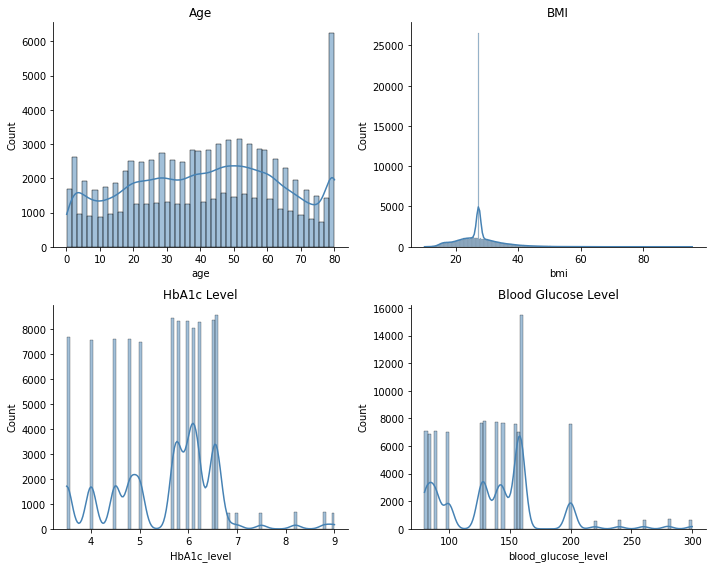

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.histplot(data['age'], kde=True, ax=axes[0, 0], color='steelblue')
sns.histplot(data['bmi'], kde=True, ax=axes[0, 1], color='steelblue')
sns.histplot(data['HbA1c_level'], kde=True, ax=axes[1, 0], color='steelblue')
sns.histplot(data['blood_glucose_level'], kde=True, ax=axes[1, 1], color='steelblue')

axes[0, 0].set_title('Age')
axes[0, 1].set_title('BMI')
axes[1, 0].set_title('HbA1c Level')
axes[1, 1].set_title('Blood Glucose Level')

sns.despine()
plt.tight_layout()
plt.show()

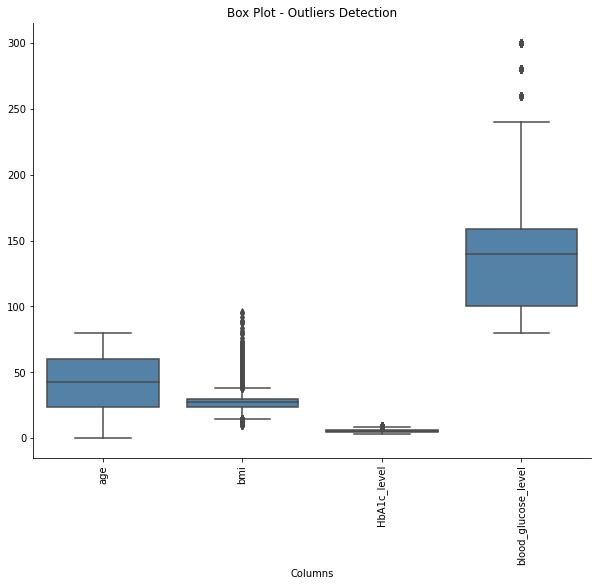

In [9]:
subset_data = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=subset_data, ax=ax, color='steelblue')
ax.set_title('Box Plot - Outliers Detection')
ax.set_xlabel('Columns')
plt.xticks(rotation=90)

sns.despine()
plt.show()

### 3. Categorical features

The same approach can be adopted to visualise the distribution and balance of categorical features, including the target variable ('diabetes').

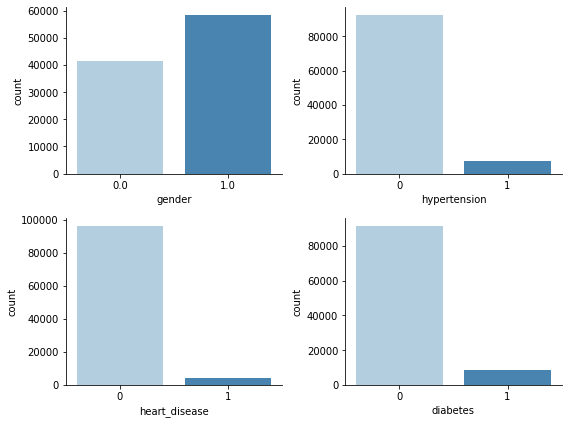

In [10]:
subset_data = data[['gender', 'hypertension', 'heart_disease', 'diabetes']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

sns.countplot(x='gender', data=subset_data, ax=axes[0, 0], palette="Blues")
sns.countplot(x='hypertension', data=subset_data, ax=axes[0, 1], palette="Blues")
sns.countplot(x='heart_disease', data=subset_data, ax=axes[1, 0], palette="Blues")
sns.countplot(x='diabetes', data=subset_data, ax=axes[1, 1], palette="Blues")

plt.xticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()

4. Relationship and Correlation between features

Understanding the relationship and correlation between features is crucial for effective feature selection, model performance, feature engineering, interpretability and gaining insight from data. It allows us to make informed decisions throughout the machine learning process, leading to better models and more accurate predictions.

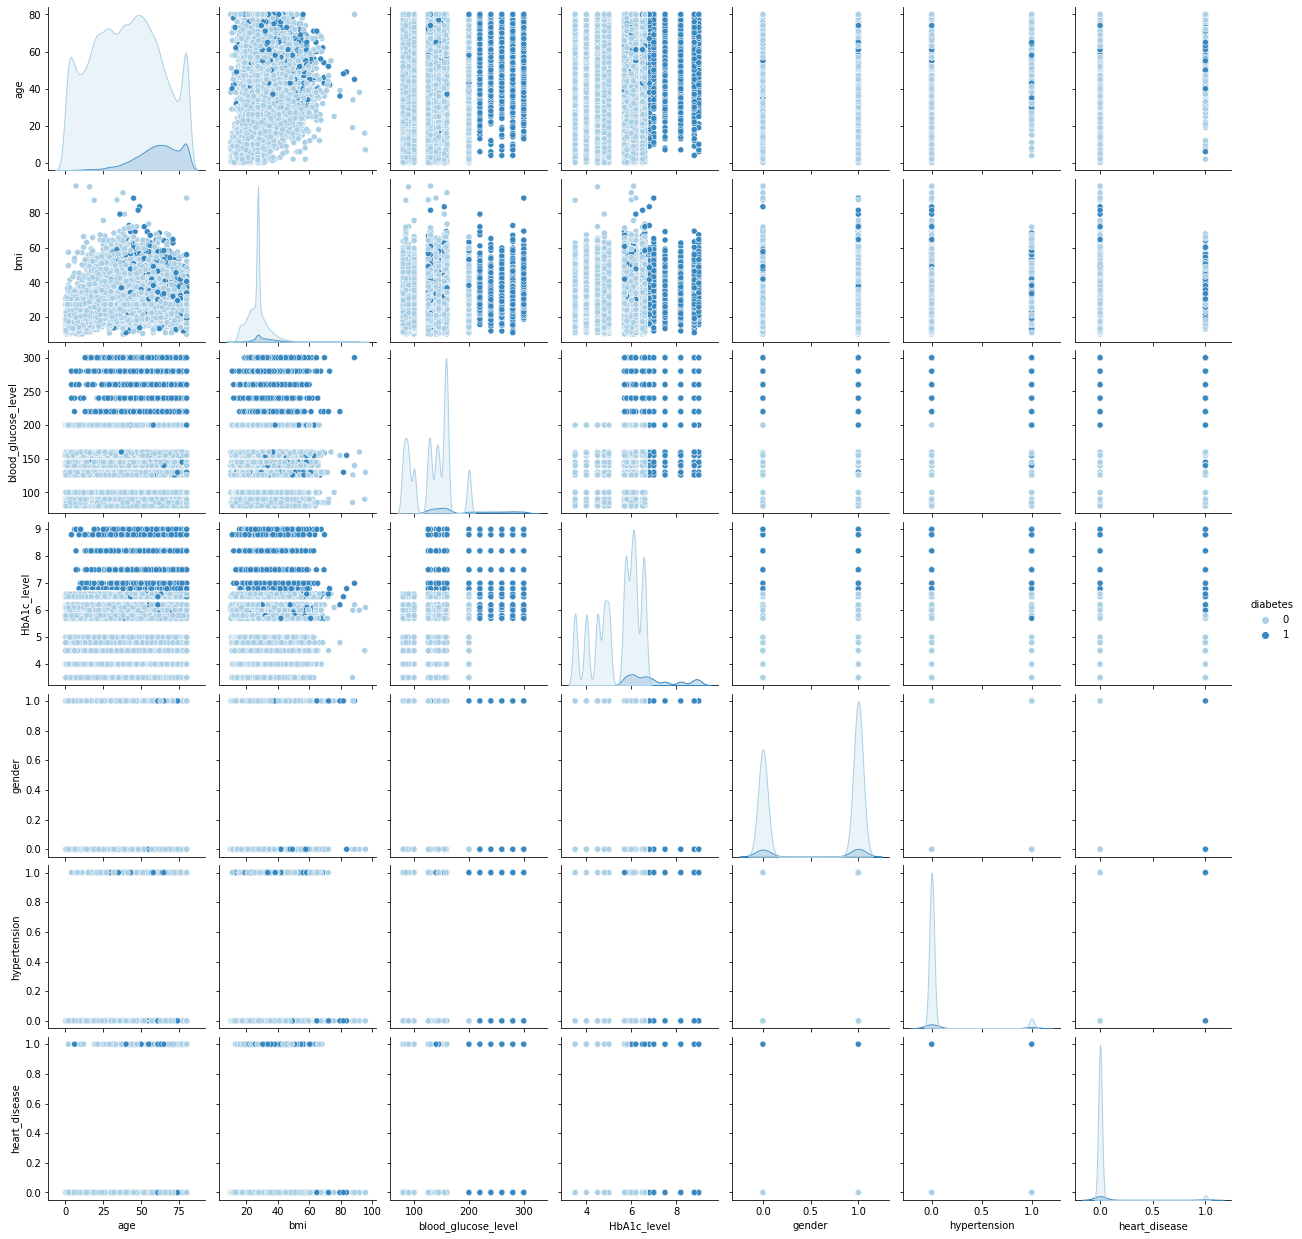

In [11]:
subset_data = data[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'gender','hypertension', 'heart_disease', 'diabetes']]

sns.pairplot(subset_data, hue='diabetes', palette='Blues')

sns.despine()
plt.show()

In [12]:
corr_matrix = data.corr()
print('Correlation matrix:\n', corr_matrix)

Correlation matrix:
                        gender       age  hypertension  heart_disease  \
gender               1.000000  0.030369     -0.014381      -0.077886   
age                  0.030369  1.000000      0.251171       0.233354   
hypertension        -0.014381  0.251171      1.000000       0.121262   
heart_disease       -0.077886  0.233354      0.121262       1.000000   
bmi                  0.023023  0.337396      0.147666       0.061198   
HbA1c_level         -0.020044  0.101354      0.080939       0.067589   
blood_glucose_level -0.017196  0.110672      0.084429       0.070066   
diabetes            -0.037623  0.258008      0.197823       0.171727   

                          bmi  HbA1c_level  blood_glucose_level  diabetes  
gender               0.023023    -0.020044            -0.017196 -0.037623  
age                  0.337396     0.101354             0.110672  0.258008  
hypertension         0.147666     0.080939             0.084429  0.197823  
heart_disease        0.061

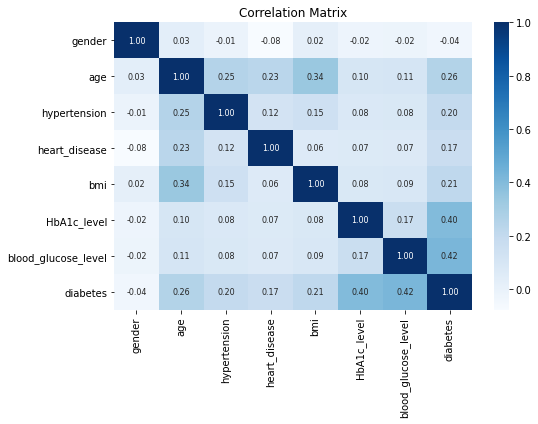

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", annot_kws={'fontsize': 8})
plt.title('Correlation Matrix')
plt.tight_layout()

plt.show()

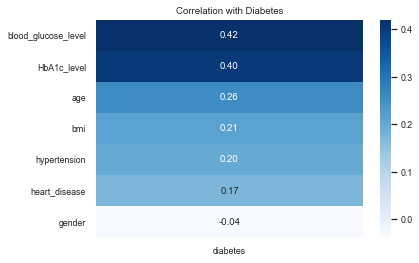

In [14]:
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_palette("pastel")
sns.heatmap(target_corr_sorted.to_frame(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

5. Target variable

By examining the distribution of the target variable's values, we observe a significant imbalance. This indicates that the application of an oversampling or undersampling technique may be required to solve this issue.


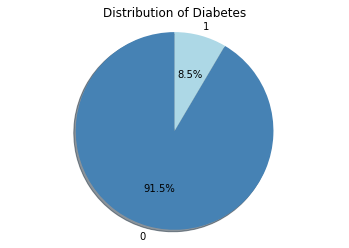

In [7]:
diabetes_counts = data['diabetes'].value_counts()

colors = ['steelblue', 'lightblue']
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow='True')

plt.title('Distribution of Diabetes')
plt.axis('equal')

plt.show()

Column transformations

To assist in the column transformations, I have classified the features into two groups: numerical and categorical. This division allows me to apply transformations that suit the inherent properties of each type of feature. 
The following figure illustrates the specific transformations applied to the numerical and categorical features:

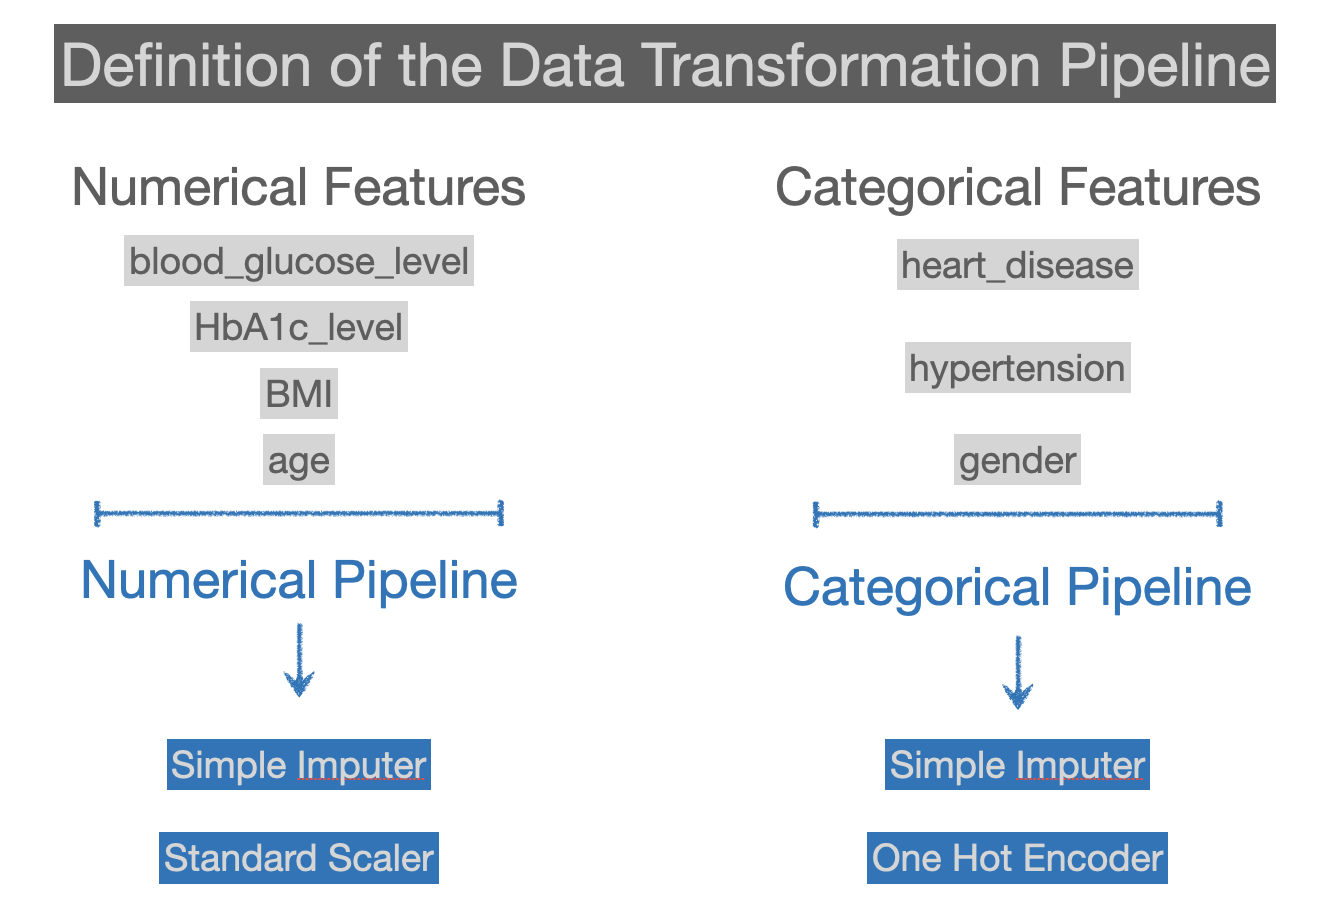

In [15]:
numerical_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('hot', OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'))
])

final_transformation = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline ,['HbA1c_level', 'blood_glucose_level', 'bmi', 'age']),
    ('categorical',categorical_pipeline, ['gender', 'hypertension', 'heart_disease']),
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

Training & Test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('diabetes', axis=1), data['diabetes'], test_size=0.2, stratify=data['diabetes'], random_state=42)

Model Selection

• Logistic Regression: Logistic regression is a statistical method for binary classification problems, which aims to predict a binary outcome from the input characteristics. The logistic function is used to model the relationship between the inputs and the binary outcome by assigning real-valued inputs to a probability between 0 and 1. The model is optimised by minimising a cost function using gradient descent. Once trained, the model can be used to make predictions by calculating the predicted probability and constraining it to make a binary decision. Logistic regression is simple, fast and provides a probabilistic interpretation of the output, but has limitations and can be improved using more complex models.

• K-Nearest Neighbors (KNN): K-Nearest Neighbors (KNN) is a non-parametric method for classification and regression problems. It works by finding the K data points closest to a new sample in the feature space and classifying the new sample based on the majority class of its K nearest neighbours. KNN has a simple implementation, as it requires no training phase and stores the entire dataset to make predictions. The choice of K is important, as a small K will lead to over-fitting, while a large K will lead to under-fitting. KNN can handle multi-class problems, non-linear decision boundaries and can be used for regression using the mean or median of K nearest neighbours as a prediction.

• Random Forest (RF): Random Forest is an ensemble machine learning algorithm used for both classification and regression problems. It works by combining several decision trees, each of which is trained with a random subset of data and a random subset of features. During prediction, the Random Forest takes a majority vote or the average of the results of the individual trees to make a final prediction. This technique helps reduce overfitting by averaging the errors made by the individual trees and improving the model's overall performance.

• Support Vector Classifier (SVC): The support vector classifier (SVC) is a supervised machine learning algorithm used for classification problems. It is based on the concept of support vector machines (SVM). SVC attempts to find the optimal boundary (known as a hyperplane) that separates data points into different classes in a multidimensional space. The boundary that maximises the margin, i.e. the distance between the boundary and the nearest data points, is considered the optimal boundary. These data points closest to the boundary are known as support vectors.



In [17]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE(n_jobs=-1)),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [18]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['HbA1c_level',
                                                   'blood_glucose_level', 'bmi',
                                                   'age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(n_jobs=-1)),
                ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [19]:
model_pipeline.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

Model Configurations

In the hyperparameter optimisation phase of model selection, we define the hyperparameter settings to be explored. Our goal is to find the best combination of classification models with their respective hyperparameters, dimensionality reduction techniques and methods to address class imbalance. By systematically iterating through various combinations, considering different options and potentially omitting certain steps, we will identify the most effective configuration for our model.

In [21]:
sampler_configs = [
    {
        'sampler':[None],
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 0.9, 0.7]
    },
    {
        'sampler':[RandomUnderSampler()],
        'sampler__sampling_strategy':['majority', 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.9]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,10]  
    }
]

classifier_configs = [
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.01,10),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [50, 100, 150],
        'classifier__max_depth' : [4, 6, 10]
    },
    {
        'classifier' : [SVC()],
        'classifier__C' : loguniform(0.01, 10),
        'classifier__kernel' : ['linear', 'rbf'],
        'classifier__class_weight' : [None, 'balanced']
    },
    {
    'classifier': [XGBClassifier()],
    'classifier__n_estimators': [50, 100, 150]
}
]

In [22]:
all_configs = []
for configuration in itertools.product(sampler_configs, dim_reduction_configs, classifier_configs):
    all_configs.append((dict(itertools.chain(*(e.items() for e in configuration))))) 
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 45'

Model Selection

In [23]:
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [24]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 2,
    n_jobs=-1,
    cv = skf,
    scoring='f1'
)

In [ ]:
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=3) #about 1.30 h

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......................................., score=0.815 total time= 5.3min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min remaining:    0.0s


In [27]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

None
SequentialFeatureSelector(cv=None, estimator=Perceptron(), k_features=(5, 5),
                          scoring='f1')
RandomForestClassifier(max_depth=10, n_estimators=150) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8130718954248365
----------
None
None
RandomForestClassifier(max_depth=10) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None

In [19]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.8008112159421568, F1 on test set:0.8053408292340126
F1 on training set:0.8050237133321623, F1 on test set:0.8060329708874079
F1 on training set:0.8008112159421568, F1 on test set:0.8053408292340126
F1 on training set:0.8008112159421568, F1 on test set:0.8053408292340126
F1 on training set:0.8059334679188975, F1 on test set:0.8047669120224326


Hyperparameter tunning

After careful evaluation, I have concluded my pipeline model. The selected components include the final_transformation (created a priori) and a Random Forest classifier. The Random Forest classifier is configured with a maximum depth of 10. This choice outperformed other classifiers in previous evaluations.  


In [88]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('dim_reduction', SFS(estimator=Perceptron(), cv = None, scoring = 'f1')),
    ('classifier',RandomForestClassifier())
])

In [89]:
params = {
    'dim_reduction__estimator': [Perceptron()],
    'dim_reduction__k_features': [5, 5],
    'classifier__n_estimators': [150],
    'classifier__max_depth': [10]
}

In [90]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [91]:
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('numerical',
                                                                               Pipeline(steps=[('imp',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['HbA1c_level',
                                                                                'blood_glucose_level',
                                                                                'bmi',
                                                                                'age']),
                                                                              ('categorical',
                                                                               Pipeline(s...
                                                                                'heart_disease'])],
                                                                verbose_feature_names_out=False)),
                                             ('dim_reduction',
                                              SequentialFeatureSelector(cv=None,
                                                                        estimator=Perceptron(),
                                                                        scoring='f1')),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   n_iter=20,
                   param_distributions={'classifier__max_depth': [10],
                                        'classifier__n_estimators': [150],
                                        'dim_reduction__estimator': [Perceptron()],
                                        'dim_reduction__k_features': [5, 5]},
                   scoring='f1')

In [92]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['HbA1c_level',
                                                   'blood_glucose_level', 'bmi',
                                                   'age']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease'])],
                                   verbose_feature_names_out=False)),
                ('dim_reduction',
                 SequentialFeatureSelector(cv=None, estimator=Perceptron(),
                                           k_features=(5, 5), scoring='f1')),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=150))])

In [93]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))

0.8053408292340126

Model Evaluation

Confusion matrix

When we deal with a classification problem, we can build the so-called confusion matrix. It’s a cross table that mixes real and predicted values building an NxN matrix, where N is the number of classes. In our case, i.e., a binary classification problem, we have 2 classes.

For a perfect model, we expect a diagonal matrix. The off-diagonal elements (the falses) are mistakes made by our model, so we would like them to be as few as possible. The correct predictions (the trues) are the most important part of the confusion matrix. The positives are those records for which the model has predicted 1, while the negatives are those records for which the model has predicted 0. Combining trues/falses and positives/negatives we get the True Positives, True Negatives, False Positives, False Negatives.

Using these 4 numbers, we can build a lot of metrics that can be used to assess the goodness of a model, such as accuracy, precision, and recall.

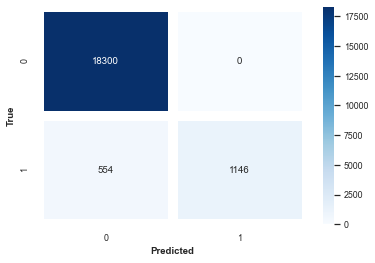

<Figure size 432x288 with 0 Axes>

In [94]:
y_pred = rs_best.best_estimator_.predict(X_test) 

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, linewidths=10, annot=True, cmap='Blues', fmt='g') 
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')

fig = plt.figure()
fig.tight_layout() 
plt.show()

ROC Curve

AUC is a measure of the overall performance of a binary classifier, and represents the area under the curve of the receiver operating characteristic (ROC) curve. 

The ROC curve is a graphical representation of the trade-off between sensitivity and specificity, and helps us choose the optimal threshold for our model.

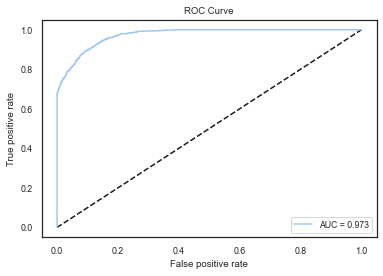

In [95]:
# Calculate AUC
y_pred_prod = rs_best.best_estimator_.predict_proba(X_test)[:,1] 
auc = roc_auc_score(y_test, y_pred_prod)

# ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prod) 
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))

# True Positive Rate = TP / (TP + FN); Recall
plt.xlabel('False positive rate')

# False Positive Rate = FP / FP + TN; 1 - Recall
plt.ylabel('True positive rate') 
plt.title('ROC Curve') 
plt.legend(loc='best')
fig.tight_layout() 
plt.show()

Classification report

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f16c6232-c777-4fa1-8446-4deb5078fd76' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [96]:
performances = {
    'accuracy' : accuracy_score, 
    'precision' : precision_score, 
    'recall' : recall_score,
    'f1' : f1_score,
    'AuC' : roc_auc_score
}
data_sets = {
    'train' : (X_train, y_train), 
    'test' : (X_test, y_test)
}
evaluation = {k:[]for k in performances.keys()} 
evaluation['data_set'] = []

In [97]:
cls = rs_best.best_estimator_ 
cls.fit(*data_sets['train'])

for d_name, d_set in data_sets.items(): 
    evaluation['data_set'].append(d_name)
    y_pred = cls.predict(d_set[0])
    y_pred_prob = cls.predict_proba(d_set[0])[:,1] 
    for perf_name, perf in performances.items():
        if perf_name == 'AuC': 
            evaluation[perf_name].append(perf(d_set[1], y_pred_prob))
        else:
            evaluation[perf_name].append(perf(d_set[1], y_pred))
            
df_evaluation = pd.DataFrame(evaluation) 
df_evaluation

,accuracy,precision,recall,f1,AuC,data_set
0,0.971762,1.0,0.667794,0.800811,0.975129,train
1,0.972300,1.0,0.674118,0.805341,0.973209,test


In [98]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))

0.8053408292340126

In [99]:
cls = rs_best.best_estimator_

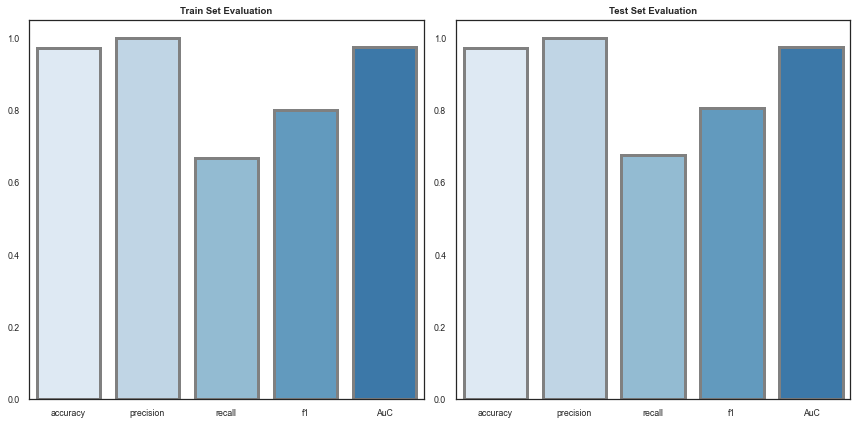

In [100]:
fig=plt.figure(figsize=(12,6))

ax=fig.add_subplot(1,2,1)
sns.barplot(data=df_evaluation[:1], palette=sns.color_palette('Blues'), capsize=.4, linewidth=3, edgecolor=".5") 
ax.set_title('Train Set Evaluation', fontweight='bold')

ax=fig.add_subplot(1,2,2)
sns.barplot(data=df_evaluation[1:2], palette=sns.color_palette('Blues'), capsize=.4, linewidth=3, edgecolor=".5") 
ax.set_title('Test Set Evaluation', fontweight='bold')

fig.tight_layout() 
plt.show()

In [101]:
train_sizes, train_scores, test_scores = learning_curve(cls, 
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], 
                                                        cv = 5,
                                                        n_jobs = -1,
                                                        scoring = 'f1',
                                                        shuffle = False)

(0.6, 1.03)

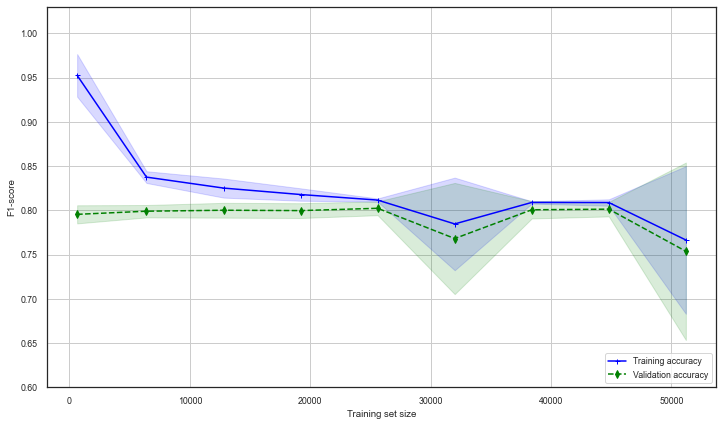

In [102]:
train_mean = np.mean(train_scores, axis=1) 
train_std = np.std(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1) 
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7)) 
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean, 
        color='blue', marker='+',
        markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std, 
                alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean, 
        color='green', linestyle='--',
        marker='d', markersize=5, 
        label='Validation accuracy')

ax.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std, 
                alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size') 
ax.set_ylabel('F1-score') 
ax.legend(loc='lower right') 
ax.set_ylim([0.60, 1.03])

In [103]:
param_range = [50, 100, 150]
train_scores, test_scores = validation_curve(cls, 
                                             X_train,
                                             y_train, 
                                             param_name='classifier__n_estimators', 
                                             param_range=param_range, 
                                             cv=5,
                                             n_jobs=-1,
                                             scoring='f1'
)

(50.0, 150.0)

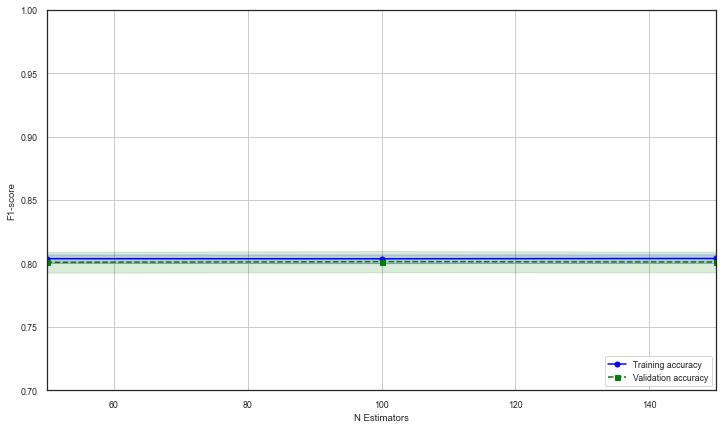

In [104]:
train_mean = np.mean(train_scores, axis=1) 
train_std = np.std(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1) 
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7)) 
ax = fig.add_subplot() 
ax.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, 
        label='Training accuracy')

ax.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std, 
                alpha=0.15, color='blue')

ax.plot(param_range, test_mean, 
        color='green', linestyle='--',
        marker='s', markersize=5, 
        label='Validation accuracy')

ax.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std, 
                alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('N Estimators') 
ax.set_ylabel('F1-score') 
ax.legend(loc='lower right') 
ax.set_ylim([0.7, 1])
ax.set_xlim([50, 150])